In [2]:
import pandas as pd

# Load the uploaded Excel file to examine its structure and contents
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [3]:
# Load each sheet into a DataFrame
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each dataset to understand their structure
user_details.head(), cooking_sessions.head(), order_details.head()

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [20]:
# Check for missing values and data types in each dataset
user_details_info = user_details.info(), user_details.isnull().sum()
cooking_sessions_info = cooking_sessions.info(), cooking_sessions.isnull().sum()
order_details_info = order_details.info(), order_details.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session

In [6]:
user_details_info, cooking_sessions_info, order_details_info

((None,
  User ID              0
  User Name            0
  Age                  0
  Location             0
  Registration Date    0
  Phone                0
  Email                0
  Favorite Meal        0
  Total Orders         0
  dtype: int64),
 (None,
  Session ID         0
  User ID            0
  Dish Name          0
  Meal Type          0
  Session Start      0
  Session End        0
  Duration (mins)    0
  Session Rating     0
  dtype: int64),
 (None,
  Order ID        0
  User ID         0
  Order Date      0
  Meal Type       0
  Dish Name       0
  Order Status    0
  Amount (USD)    0
  Time of Day     0
  Rating          2
  Session ID      0
  dtype: int64))

In [9]:
# Handle missing values in the 'Rating' column of OrderDetails
# Option: Fill missing ratings with the mean rating for simplicity
mean_rating = order_details['Rating'].mean()
order_details['Rating'].fillna(mean_rating, inplace=True)

# Verify that there are no more missing values
order_details.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_8440\3061382970.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(mean_rating, inplace=True)


Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

In [12]:
mean_rating = order_details['Rating'].mean()
order_details['Rating'].fillna(mean_rating, inplace=True)
mean_rating

C:\Users\HP\AppData\Local\Temp\ipykernel_8440\645358272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(mean_rating, inplace=True)


4.285714285714286

In [13]:
# Step 2: Check for duplicates in all datasets and remove if found
user_details = user_details.drop_duplicates()
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()

In [15]:
user_details.head(5),cooking_sessions.head(5),order_details.head(5)

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [16]:
# Step 3: Standardize formats
# Ensure date columns are in datetime format
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [18]:
# Standardize text columns to lowercase
user_details['Location'] = user_details['Location'].str.lower()
cooking_sessions['Dish Name'] = cooking_sessions['Dish Name'].str.lower()
order_details['Dish Name'] = order_details['Dish Name'].str.lower()
order_details['Meal Type'] = order_details['Meal Type'].str.lower()

In [19]:
# Verify cleaning steps
user_details.head(), cooking_sessions.head(), order_details.head()

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       new york        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    los angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  san francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     caesar salad      Lunch 202

In [23]:
# Step 4: Merge datasets
# Merge UserDetails and CookingSessions on 'User ID'
merged_data_1 = pd.merge(cooking_sessions, user_details, on='User ID', how='inner')
merged_data_1.head(5)

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,new york,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,caesar salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,los angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,grilled chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,new york,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,caesar salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,san francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10


In [25]:
# Merge the result with OrderDetails on 'Session ID'
final_data = pd.merge(merged_data_1, order_details, on='Session ID', how='inner')
final_data.head(5)

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Total Orders,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,12,1001,U001,2024-12-01,dinner,spaghetti,Completed,15.0,Night,5.000000
1,S002,U002,caesar salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,8,1002,U002,2024-12-01,lunch,caesar salad,Completed,10.0,Day,4.000000
2,S003,U003,grilled chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,15,1003,U003,2024-12-02,dinner,grilled chicken,Canceled,12.5,Night,4.285714
3,S004,U001,pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,12,1004,U001,2024-12-02,breakfast,pancakes,Completed,8.0,Morning,4.000000
4,S005,U004,caesar salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,10,1005,U004,2024-12-03,lunch,caesar salad,Completed,9.0,Day,4.000000


In [26]:
# Save the cleaned and merged dataset to a new file
final_data.to_csv('cleaned_merged_data.csv', index=False)

In [27]:
# Verify the final dataset
print(final_data.head())

  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0       S001      U001        spaghetti      Dinner 2024-12-01 19:00:00   
1       S002      U002     caesar salad       Lunch 2024-12-01 12:00:00   
2       S003      U003  grilled chicken      Dinner 2024-12-02 19:30:00   
3       S004      U001         pancakes   Breakfast 2024-12-02 07:30:00   
4       S005      U004     caesar salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
4 2024-12-03 13:15:00               15             4.7    David Brown   27   

   ... Total Orders Order ID User ID_y Order Date Meal Type_y  \
0  ...         

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Analysis: Top 10 most-ordered dishes
top_dishes = final_data['Dish Name_x'].value_counts().head(10)
top_dishes

Dish Name_x
spaghetti          4
grilled chicken    4
caesar salad       3
pancakes           2
veggie burger      2
oatmeal            1
Name: count, dtype: int64

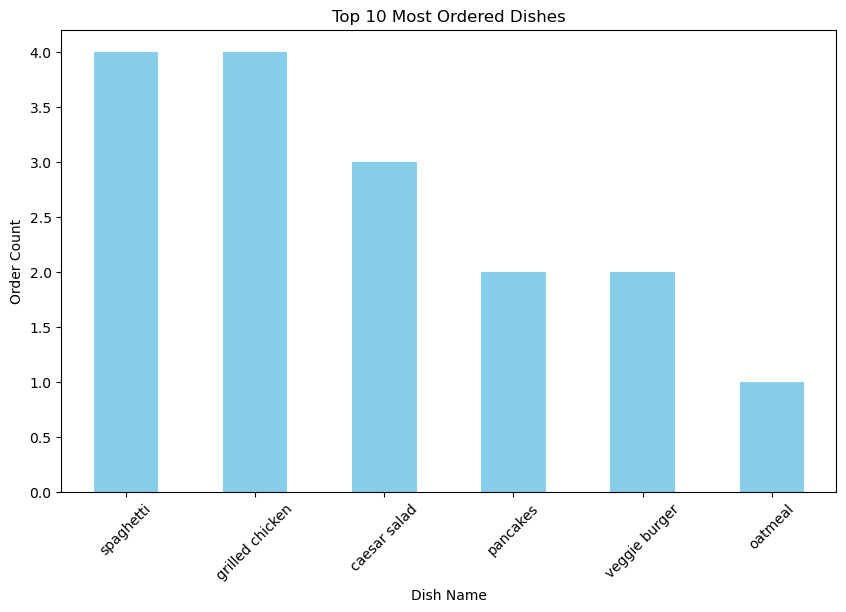

In [31]:
# Visualization: Bar Chart for Top Dishes
plt.figure(figsize=(10, 6))
top_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

### Spaghetti and Grilled Chicken are the most popular dishes, both with the highest order count.
### Dishes like Caesar Salad, Pancakes, and Veggie Burger follow, with moderate order counts.
### Oatmeal has the least number of orders, suggesting it might be less popular among users.

In [33]:
# Analysis: Correlation between Session Rating and Order Amount
correlation_data = final_data[['Session Rating', 'Amount (USD)']].corr()
correlation_data

,Session Rating,Amount (USD)
Session Rating,1.000000,0.502733
Amount (USD),0.502733,1.000000


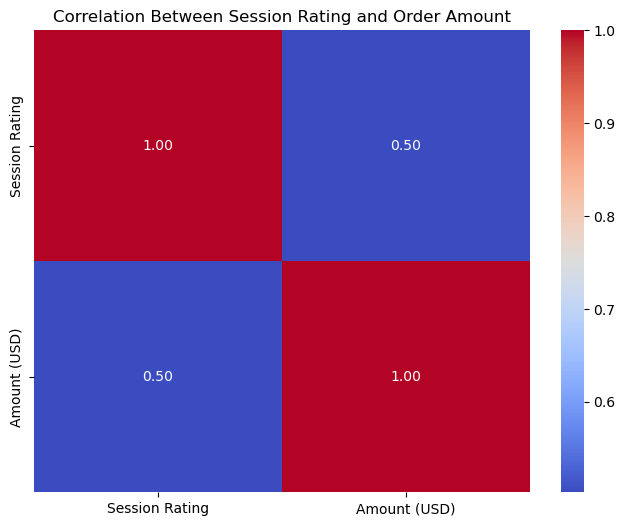

In [34]:
# Visualization: Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Session Rating and Order Amount')
plt.show()

In [36]:
age_distribution = final_data['Age'].describe()
print(age_distribution)

count    16.000000
mean     32.687500
std       5.839164
min      25.000000
25%      28.000000
50%      30.500000
75%      35.750000
max      42.000000
Name: Age, dtype: float64


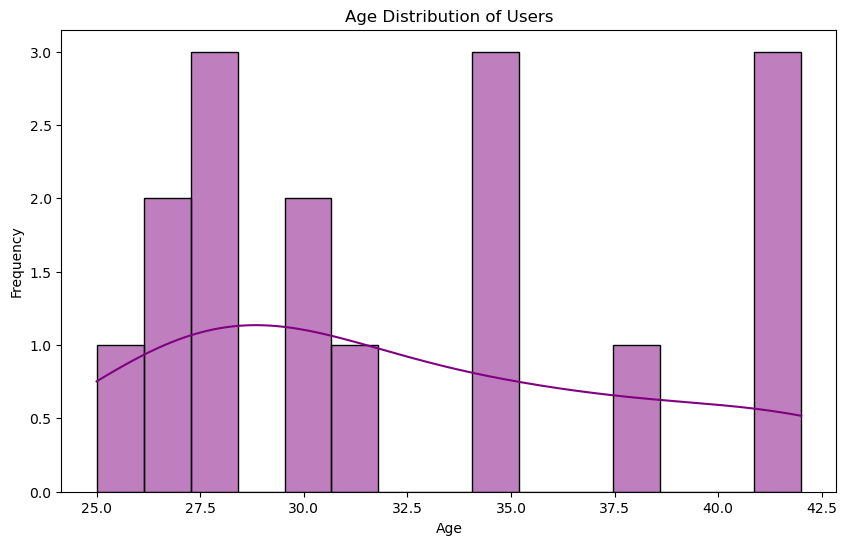

In [35]:
# Analysis: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Age'], bins=15, kde=True, color='purple')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Summary of Results: The analysis revealed that most users are concentrated between the ages of 25 and 42, with a relatively even distribution across this range. 
### The average age is about 32.7 years.